<a href="https://colab.research.google.com/github/Srujan-rai/diabetic_retinopathy_detetion/blob/main/all_in_one_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [8]:
main_data_dir = "/content/colored_images/colored_images"
image_size = (224, 224)
batch_size = 16

In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
train_data = datagen.flow_from_directory(
    main_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 35126 images belonging to 5 classes.


In [11]:
test_data = datagen.flow_from_directory(
    main_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 0 images belonging to 5 classes.


In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 5
history = model.fit(train_data, epochs=epochs, validation_data=test_data,verbose=1)

Epoch 1/5
2196/2196 [==============================] - 549s 245ms/step - loss: 0.8821 - accuracy: 0.7344
Epoch 2/5
 931/2196 [===========>..................] - ETA: 4:36 - loss: 0.8817 - accuracy: 0.7300

In [ ]:
model.save("disease_model.h5")

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Assuming you have trained your model and have access to the test_data
num_batches = len(test_data)
predictions = []

for i in range(num_batches):
    batch_data = test_data[i]
    batch_pred = model.predict_on_batch(batch_data[0])
    predictions.append(batch_pred)

predictions = np.vstack(predictions)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
class_labels=['MILD','moderate','NO_DR','proliferate_dr','Severe']
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes=5
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_data.classes, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend()
plt.show()



ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_data.classes, predictions.argmax(axis=1))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import matplotlib.pyplot as plt



# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


DATASET COFIG

In [6]:

!cp -r /content/colored_images/colored_images/Severe  /content/drive/MyDrive/dataset/colored_images

In [3]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-2015-data-colored-resized

100% 1.93G/1.94G [00:16<00:00, 243MB/s]
100% 1.94G/1.94G [00:16<00:00, 126MB/s]


In [2]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/


In [4]:
!unzip /content/diabetic-retinopathy-2015-data-colored-resized.zip


Streaming output truncated to the last 5000 lines.
  inflating: colored_images/colored_images/No_DR/4632_left.png  
  inflating: colored_images/colored_images/No_DR/4632_right.png  
  inflating: colored_images/colored_images/No_DR/4633_right.png  
  inflating: colored_images/colored_images/No_DR/4641_left.png  
  inflating: colored_images/colored_images/No_DR/4641_right.png  
  inflating: colored_images/colored_images/No_DR/4642_left.png  
  inflating: colored_images/colored_images/No_DR/4642_right.png  
  inflating: colored_images/colored_images/No_DR/4649_left.png  
  inflating: colored_images/colored_images/No_DR/4649_right.png  
  inflating: colored_images/colored_images/No_DR/4652_left.png  
  inflating: colored_images/colored_images/No_DR/4652_right.png  
  inflating: colored_images/colored_images/No_DR/4658_left.png  
  inflating: colored_images/colored_images/No_DR/4658_right.png  
  inflating: colored_images/colored_images/No_DR/4659_left.png  
  inflating: colored_images/colo

KeyError: ignored

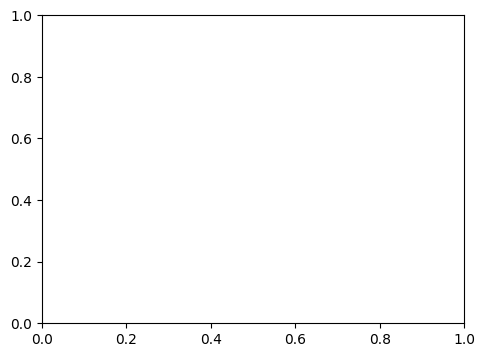

In [ ]:

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()



In [ ]:
import shutil
source="/content/colored_images/colored_images/Severe"
dest="/content/drive/MyDrive/dataset/colored_images"
shutil.copy(source,dest)

IsADirectoryError: ignored